<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


Mean Squared Error: 49830096.86
R^2 Score: 0.90


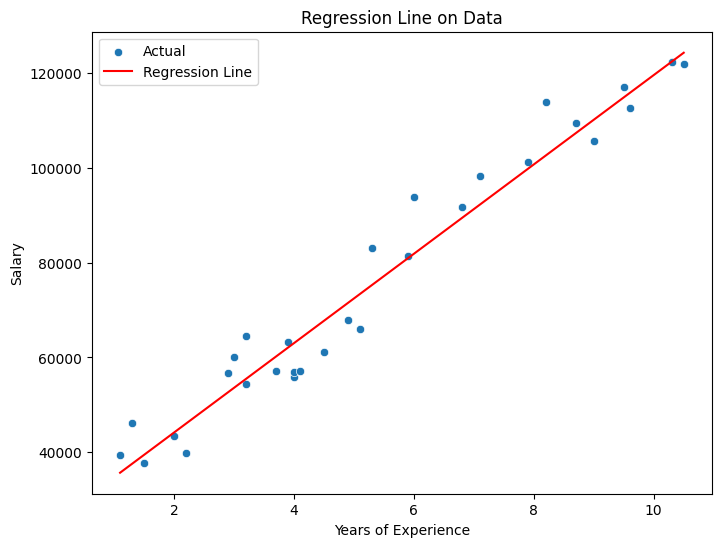

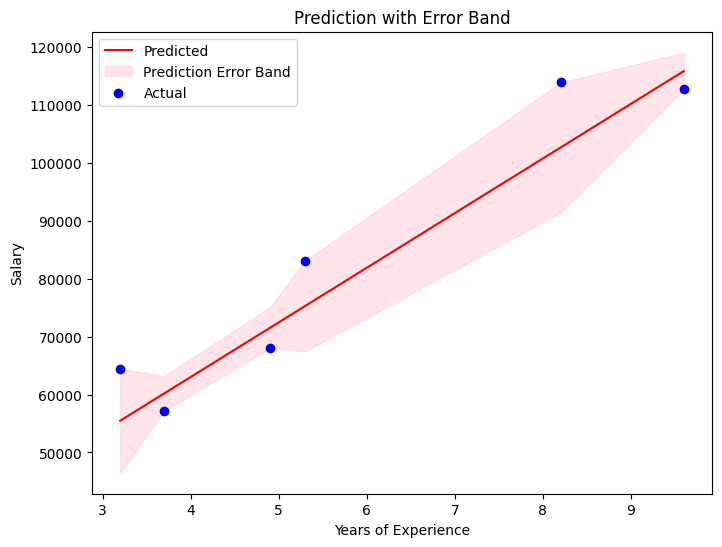

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Make sure your CSV is in ../data/Salary_Data.csv relative to this notebook
df = pd.read_csv("../data/Salary_Data.csv")
df.head()
df.info()
df.describe()
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Actual')
plt.plot(df['YearsExperience'], model.predict(df[['YearsExperience']]), color='red', label='Regression Line')
plt.title('Regression Line on Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
plt.figure(figsize=(8,6))

# Sort for smooth line & fill
sorted_idx = X_test['YearsExperience'].argsort()
X_sorted = X_test['YearsExperience'].iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]
errors_sorted = np.abs(y_test.values - y_pred)[sorted_idx]

# Plot prediction line
plt.plot(X_sorted, y_pred_sorted, color='red', label='Predicted')

# Fill error band
plt.fill_between(X_sorted, 
                 y_pred_sorted - errors_sorted, 
                 y_pred_sorted + errors_sorted, 
                 color='pink', alpha=0.4, label='Prediction Error Band')

# Actual test points
plt.scatter(X_test['YearsExperience'], y_test, color='blue', label='Actual')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction with Error Band')
plt.legend()
plt.show()
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df.reset_index(drop=True).plot(kind='bar', figsize=(10,6))
plt.title('Actual vs Predicted Salaries')
plt.ylabel('Salary')
plt.show()